<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
from torch_geometric.datasets import TUDataset, GNNBenchmarkDataset
from torch_geometric import utils
import networkx as nx
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
all_datasets = ["MUTAG","ENZYMES","PROTEINS","CIFAR10","MNIST","COLLAB","IMDB-BINARY","REDDIT-BINARY"]

In [25]:
len(degrees)

3371

## Hist of degrees of every node in the dataset

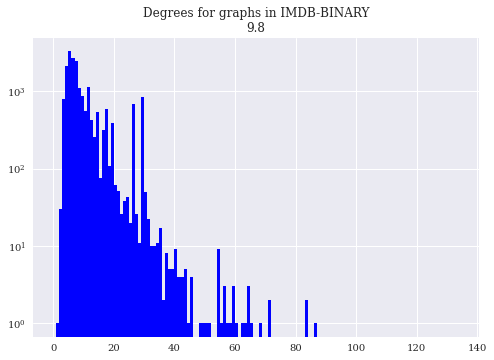

In [34]:
plt.style.use('seaborn')
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.size'] = '14'
for dataset_txt in all_datasets[:]:
    if dataset_txt in GNNBenchmarkDataset.names:
        dataset = GNNBenchmarkDataset(root='data_colab/GNNBenchmarkDataset', name=dataset_txt)
    else:
        dataset = TUDataset(root='data_colab/TUDataset',name=dataset_txt)
        
    degrees = []
    for i, graph in enumerate(dataset):
        G = utils.to_networkx(graph, to_undirected=True)
        degrees.extend(list(dict(G.degree).values()))

    cmap = cm.get_cmap('seismic')
    ll = np.array(degrees)
    plt.hist(ll, color=cmap(64), bins = range(ll.max()))
    plt.yscale('log')
    #plt.xscale('log')
    plt.title(f'Degrees for graphs in {dataset_txt}\n{ll.mean():.1f}')
    plt.savefig(f"figs/Degree_hist_{dataset_txt}.png", bbox_inches='tight')
    plt.show()

# Average degree for all graphs in datasets

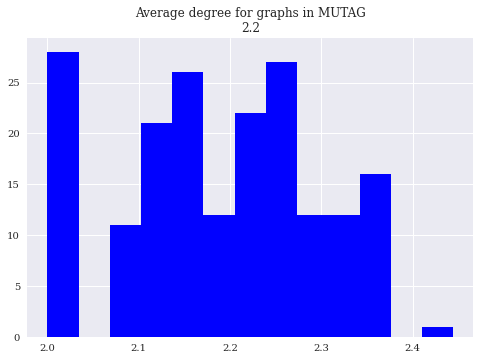

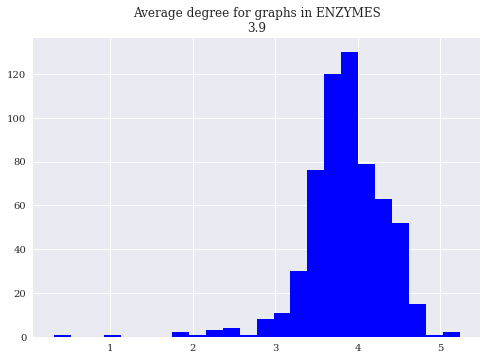

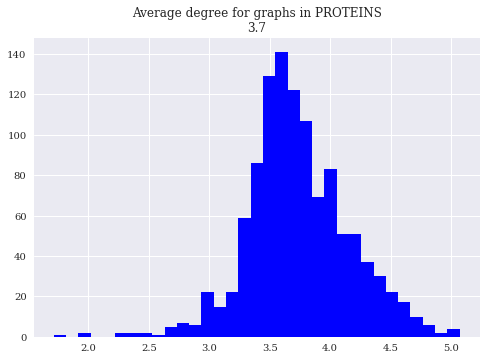

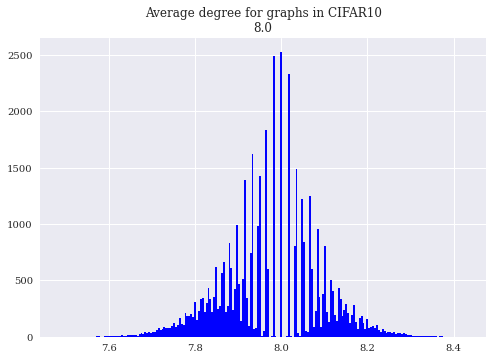

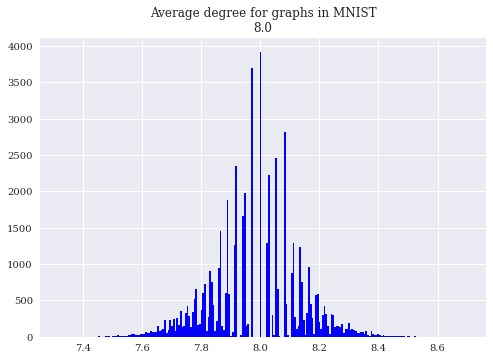

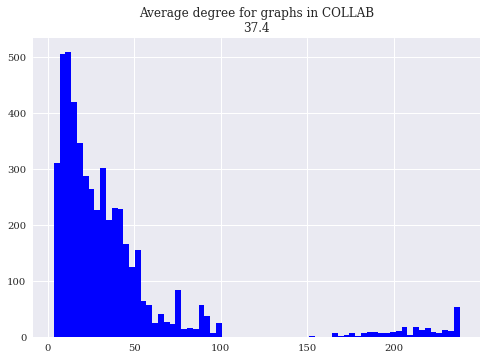

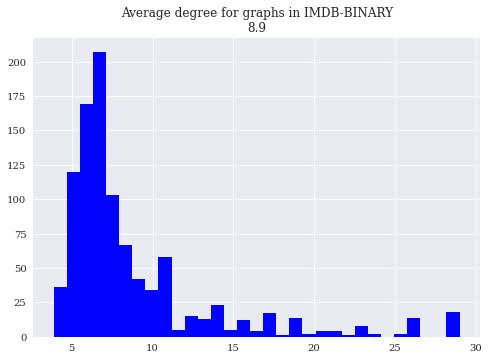

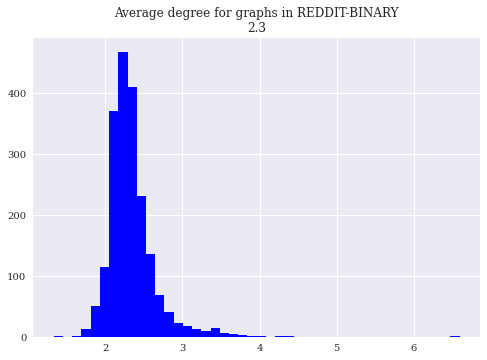

In [27]:
plt.style.use('seaborn')
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.size'] = '14'
for dataset_txt in all_datasets[:]:
    if dataset_txt in GNNBenchmarkDataset.names:
        dataset = GNNBenchmarkDataset(root='data_colab/GNNBenchmarkDataset', name=dataset_txt)
    else:
        dataset = TUDataset(root='data_colab/TUDataset',name=dataset_txt)
        
    avg_degrees = []
    for i, graph in enumerate(dataset):
        G = utils.to_networkx(graph, to_undirected=True)
        avg_degrees.append((G.number_of_edges()*2)/G.number_of_nodes())

    cmap = cm.get_cmap('seismic')
    ll = np.array(avg_degrees)
    plt.hist(ll, bins = int(np.sqrt(len(ll))), color=cmap(64))
    plt.title(f'Average degree for graphs in {dataset_txt}\n{ll.mean():.1f}')
    plt.savefig(f"figs/avg_degree_hist_{dataset_txt}.png", bbox_inches='tight')
    plt.show()

## Number nodes of all graphs in each dataset

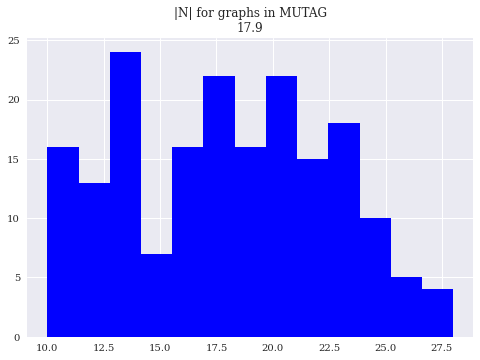

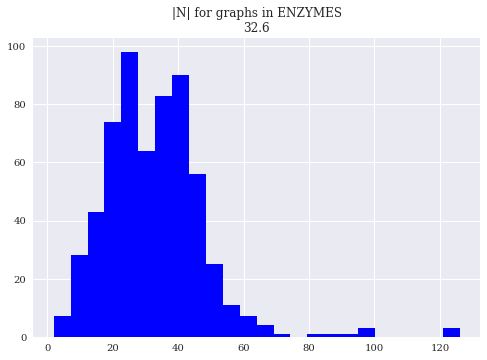

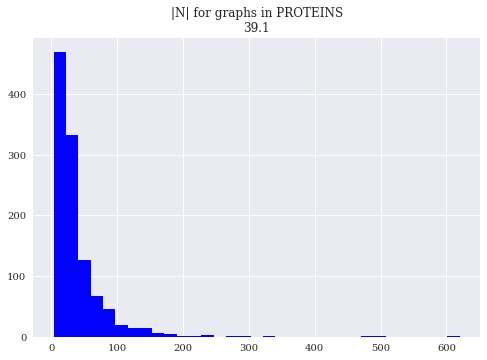

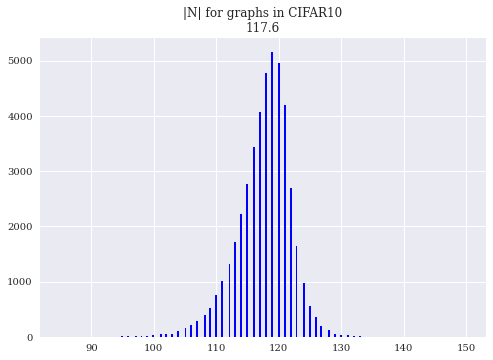

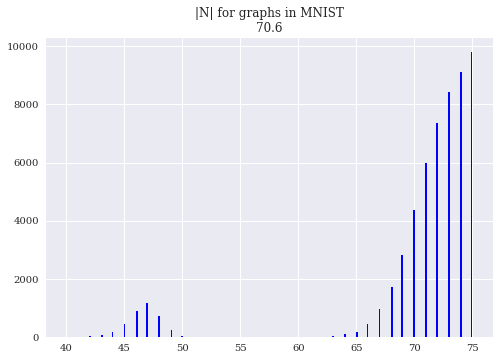

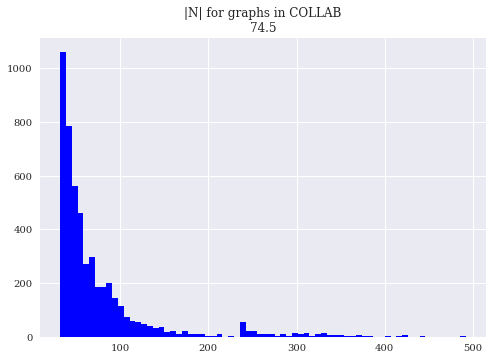

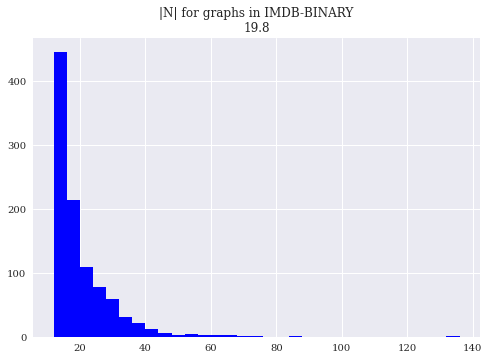

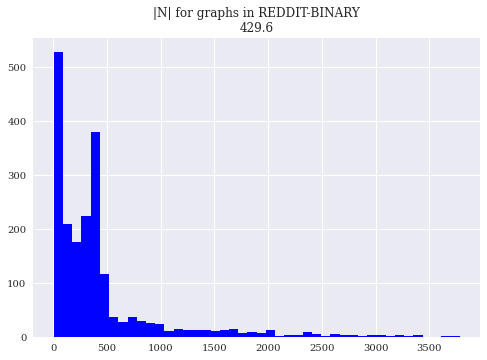

In [26]:
plt.style.use('seaborn')
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.size'] = '14'
for dataset_txt in all_datasets[:]:
    if dataset_txt in GNNBenchmarkDataset.names:
        dataset = GNNBenchmarkDataset(root='data_colab/GNNBenchmarkDataset', name=dataset_txt)
    else:
        dataset = TUDataset(root='data_colab/TUDataset',name=dataset_txt)
        
    n_nodes = []
    for i, graph in enumerate(dataset):
        G = utils.to_networkx(graph, to_undirected=True)
        n_nodes.append(G.number_of_nodes())

    cmap = cm.get_cmap('seismic')
    ll = np.array(n_nodes)
    plt.hist(ll, bins = int(np.sqrt(len(ll))), color=cmap(64))
    plt.title(f'|N| for graphs in {dataset_txt}\n{ll.mean():.1f}')
    plt.savefig(f"figs/number_nodes_hist_{dataset_txt}.png", bbox_inches='tight')
    plt.show()

In [6]:
statistics = dict()
for dataset_txt in all_datasets[:]:
    if dataset_txt in GNNBenchmarkDataset.names:
        dataset = GNNBenchmarkDataset(root='data_colab/GNNBenchmarkDataset', name=dataset_txt)
    else:
        dataset = TUDataset(root='data_colab/TUDataset',name=dataset_txt)
        
    nxdata = {
    'Assortativity':np.empty(len(dataset)),
    'Triangles':np.empty(len(dataset)),
    'Transitivity':np.empty(len(dataset)),
    'Clustering':np.empty(len(dataset)),
    'Nodes':np.empty(len(dataset)),
    'Edges':np.empty(len(dataset)),
    'AVG degree':np.empty(len(dataset))
    }
    for i, graph in enumerate(dataset):
        G = utils.to_networkx(graph, to_undirected=True)
        nxdata['Assortativity'][i] = nx.degree_assortativity_coefficient(G)
        nxdata['Triangles'][i] = np.sum(list(nx.triangles(G).values()))/3
        nxdata['Transitivity'][i] = nx.transitivity(G)
        nxdata['Clustering'][i] = nx.average_clustering(G)
        nxdata['Nodes'][i] = G.number_of_nodes()
        nxdata['Edges'][i] = G.number_of_edges()
        nxdata['AVG degree'][i] =  (nxdata['Edges'][i]*2)/ nxdata['Nodes'][i]
        
    statistics[dataset_txt] = nxdata.copy()

    print(dataset_txt,'-----------------')
    for metric in statistics[dataset_txt]:
        nans = np.isnan(statistics[dataset_txt][metric])
        mean = statistics[dataset_txt][metric][~nans].mean()
        print(f"\t{metric:>13}: {mean:>9.4f} +- {statistics[dataset_txt][metric].std():<9.4f} || nans: {np.sum(nans)}")
    print()


MUTAG -----------------
	Assortativity:   -0.2787 +- 0.1689    || nans: 0
	    Triangles:    0.0000 +- 0.0000    || nans: 0
	 Transitivity:    0.0000 +- 0.0000    || nans: 0
	   Clustering:    0.0000 +- 0.0000    || nans: 0
	        Nodes:   17.9309 +- 4.5757    || nans: 0
	        Edges:   19.7926 +- 5.6845    || nans: 0
	   AVG degree:    2.1888 +- 0.1094    || nans: 0



/home/mvrlab/miniconda3/envs/pygeomout/lib/python3.8/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


ENZYMES -----------------
	Assortativity:   -0.0080 +- nan       || nans: 3
	    Triangles:   25.5100 +- 12.1648   || nans: 0
	 Transitivity:    0.4209 +- 0.1691    || nans: 0
	   Clustering:    0.4534 +- 0.1978    || nans: 0
	        Nodes:   32.6333 +- 15.2758   || nans: 0
	        Edges:   62.1367 +- 25.4993   || nans: 0
	   AVG degree:    3.8626 +- 0.4876    || nans: 0



Extracting data_colab/TUDataset/PROTEINS/PROTEINS.zip
Processing...
Done!


PROTEINS -----------------
	Assortativity:   -0.0653 +- nan       || nans: 13
	    Triangles:   27.4043 +- 30.0314   || nans: 0
	 Transitivity:    0.4756 +- 0.2011    || nans: 0
	   Clustering:    0.5142 +- 0.2310    || nans: 0
	        Nodes:   39.0575 +- 45.7584   || nans: 0
	        Edges:   72.8158 +- 84.5990   || nans: 0
	   AVG degree:    3.7346 +- 0.4238    || nans: 0



Extracting data_colab/GNNBenchmarkDataset/CIFAR10/raw/CIFAR10_v2.zip
Processing...
Done!


CIFAR10 -----------------
	Assortativity:   -0.0072 +- 0.0481    || nans: 0
	    Triangles:  502.7055 +- 29.7830   || nans: 0
	 Transitivity:    0.4463 +- 0.0115    || nans: 0
	   Clustering:    0.4548 +- 0.0125    || nans: 0
	        Nodes:  117.6471 +- 4.2805    || nans: 0
	        Edges:  469.1514 +- 18.4479   || nans: 0
	   AVG degree:    7.9755 +- 0.1176    || nans: 0



Extracting data_colab/GNNBenchmarkDataset/MNIST/raw/MNIST_v2.zip
Processing...
Done!


MNIST -----------------
	Assortativity:    0.0000 +- 0.0602    || nans: 0
	    Triangles:  316.5787 +- 33.3384   || nans: 0
	 Transitivity:    0.4666 +- 0.0158    || nans: 0
	   Clustering:    0.4777 +- 0.0174    || nans: 0
	        Nodes:   70.5630 +- 6.8543    || nans: 0
	        Edges:  281.6233 +- 27.7969   || nans: 0
	   AVG degree:    7.9826 +- 0.1578    || nans: 0



Extracting data_colab/TUDataset/COLLAB/COLLAB.zip
Processing...
Done!


COLLAB -----------------
	Assortativity:   -0.0328 +- nan       || nans: 680
	    Triangles: 124551.3494 +- 486668.5148 || nans: 0
	 Transitivity:    0.7666 +- 0.2147    || nans: 0
	   Clustering:    0.8908 +- 0.0821    || nans: 0
	        Nodes:   74.4948 +- 62.3008   || nans: 0
	        Edges: 2457.2158 +- 6438.9154 || nans: 0
	   AVG degree:   37.3696 +- 43.9684   || nans: 0



Extracting data_colab/TUDataset/IMDB-BINARY/IMDB-BINARY.zip
Processing...
Done!


IMDB-BINARY -----------------
	Assortativity:   -0.1350 +- nan       || nans: 139
	    Triangles:  391.9910 +- 868.5403  || nans: 0
	 Transitivity:    0.7729 +- 0.1560    || nans: 0
	   Clustering:    0.9471 +- 0.0334    || nans: 0
	        Nodes:   19.7730 +- 10.0553   || nans: 0
	        Edges:   96.5310 +- 105.6003  || nans: 0
	   AVG degree:    8.8859 +- 5.0491    || nans: 0



/home/mvrlab/miniconda3/envs/pygeomout/lib/python3.8/site-packages/torch_geometric/data/dataset.py:150: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to sure to delete 'data_colab/TUDataset/REDDIT-BINARY/processed' first
  warnings.warn(


REDDIT-BINARY -----------------
	Assortativity:   -0.3635 +- 0.1747    || nans: 0
	    Triangles:   24.8350 +- 41.9040   || nans: 0
	 Transitivity:    0.0097 +- 0.0156    || nans: 0
	   Clustering:    0.0476 +- 0.0639    || nans: 0
	        Nodes:  429.6270 +- 554.0582  || nans: 0
	        Edges:  497.7540 +- 622.9893  || nans: 0
	   AVG degree:    2.3379 +- 0.3119    || nans: 0



In [8]:
for dt in statistics:
    print(dt,'-----------------')
    for metric in statistics[dt]:
        nans = np.isnan(statistics[dt][metric])
        mean = statistics[dt][metric][~nans].mean()
        print(f"\t{metric:>13}: {mean:>9.4f} +- {statistics[dt][metric].std():<9.4f} || nans: {np.sum(nans)}")
    print()

MUTAG -----------------
	Assortativity:   -0.2787 +- 0.1689    || nans: 0
	    Triangles:    0.0000 +- 0.0000    || nans: 0
	 Transitivity:    0.0000 +- 0.0000    || nans: 0
	   Clustering:    0.0000 +- 0.0000    || nans: 0
	        Nodes:   17.9309 +- 4.5757    || nans: 0
	        Edges:   19.7926 +- 5.6845    || nans: 0
	   AVG degree:    2.1888 +- 0.1094    || nans: 0

ENZYMES -----------------
	Assortativity:   -0.0080 +- nan       || nans: 3
	    Triangles:   25.5100 +- 12.1648   || nans: 0
	 Transitivity:    0.4209 +- 0.1691    || nans: 0
	   Clustering:    0.4534 +- 0.1978    || nans: 0
	        Nodes:   32.6333 +- 15.2758   || nans: 0
	        Edges:   62.1367 +- 25.4993   || nans: 0
	   AVG degree:    3.8626 +- 0.4876    || nans: 0

PROTEINS -----------------
	Assortativity:   -0.0653 +- nan       || nans: 13
	    Triangles:   27.4043 +- 30.0314   || nans: 0
	 Transitivity:    0.4756 +- 0.2011    || nans: 0
	   Clustering:    0.5142 +- 0.2310    || nans: 0
	        Nodes:   39

In [15]:
mean_statistics = statistics.copy()
std_statistics = statistics.copy()

In [16]:
for dt in mean_statistics:
    for metric in statistics[dt]:
        nans = np.isnan(statistics[dt][metric])
        mean = statistics[dt][metric][~nans].mean()
        std = statistics[dt][metric][~nans].std()
        mean_statistics[dt][metric] = mean
        std_statistics[dt][metric] = std